In [77]:
import pandas as pd
import numpy as np
import matplotlib as mpl           # 그래프를 그리는 패키지
import matplotlib.pyplot as plt    # 그래프를 그리는 패키지
from matplotlib import font_manager, rc
font_path = './malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)
plt.style.use('ggplot')

In [2]:
df1 = pd.read_csv('data/교통사고_날씨_습도_요일.csv', encoding='cp949')
df1

,X,발생일,발생지_시군구,total사고건수,평균기온,일강수량,평균상대습도,합계일조시간,weekday,날짜
0,1,2017-01-01,강남구,7,3.5,0.0,75.9,1.7,일요일,공휴일
1,2,2017-01-01,강동구,2,2.3,0.0,75.9,1.7,일요일,공휴일
2,3,2017-01-01,강북구,2,3.8,0.0,75.9,1.7,일요일,공휴일
3,4,2017-01-01,강서구,6,4.8,0.0,75.9,1.7,일요일,공휴일
4,5,2017-01-01,관악구,2,3.5,0.0,75.9,1.7,일요일,공휴일
...,...,...,...,...,...,...,...,...,...,...
26387,26388,2019-12-31,용산구,3,-7.2,0.0,39.3,9.1,화요일,평일
26388,26389,2019-12-31,은평구,2,-8.6,0.0,39.3,9.1,화요일,평일
26389,26390,2019-12-31,종로구,2,NaN,NaN,NaN,NaN,화요일,평일
26390,26391,2019-12-31,중구,3,-9.3,0.0,39.3,9.1,화요일,평일


In [10]:
df1.isnull().sum() # 결측치 확인

X              0
발생일            0
발생지_시군구        0
total사고건수      0
평균기온         627
일강수량         413
평균상대습도       406
합계일조시간       648
weekday        0
날짜             0
dtype: int64

In [106]:
df2 = df1.fillna(df1.interpolate()) # 결측치 대체 앞뒤값의 중간값
df2

,X,발생일,발생지_시군구,total사고건수,평균기온,일강수량,평균상대습도,합계일조시간,weekday,날짜
0,1,2017-01-01,강남구,7,3.50,0.0,75.9,1.7,일요일,공휴일
1,2,2017-01-01,강동구,2,2.30,0.0,75.9,1.7,일요일,공휴일
2,3,2017-01-01,강북구,2,3.80,0.0,75.9,1.7,일요일,공휴일
3,4,2017-01-01,강서구,6,4.80,0.0,75.9,1.7,일요일,공휴일
4,5,2017-01-01,관악구,2,3.50,0.0,75.9,1.7,일요일,공휴일
...,...,...,...,...,...,...,...,...,...,...
26387,26388,2019-12-31,용산구,3,-7.20,0.0,39.3,9.1,화요일,평일
26388,26389,2019-12-31,은평구,2,-8.60,0.0,39.3,9.1,화요일,평일
26389,26390,2019-12-31,종로구,2,-8.95,0.0,39.3,9.1,화요일,평일
26390,26391,2019-12-31,중구,3,-9.30,0.0,39.3,9.1,화요일,평일


In [100]:
df2 = df1.dropna() # 결측치 제거
df2.shape

(25520, 10)

In [107]:
df2['날짜'].value_counts()*100/len(df2)

평일     68.043346
주말     27.440133
공휴일     4.516520
Name: 날짜, dtype: float64

In [108]:
X = df2[['total사고건수','weekday','날짜']]
X

,total사고건수,weekday,날짜
0,7,일요일,공휴일
1,2,일요일,공휴일
2,2,일요일,공휴일
3,6,일요일,공휴일
4,2,일요일,공휴일
...,...,...,...
26387,3,화요일,평일
26388,2,화요일,평일
26389,2,화요일,평일
26390,3,화요일,평일


In [36]:
type(X)

pandas.core.frame.DataFrame

In [109]:
Y = X.groupby('weekday').mean()
Y

,total사고건수
weekday,
금요일,4.895593
목요일,4.556291
수요일,4.558957
월요일,4.329111
일요일,3.538378
토요일,4.649327
화요일,4.391259


In [110]:
Y1 = Y.reindex(index=['월요일','화요일','수요일','목요일','금요일','토요일','일요일'])
Y1

,total사고건수
weekday,
월요일,4.329111
화요일,4.391259
수요일,4.558957
목요일,4.556291
금요일,4.895593
토요일,4.649327
일요일,3.538378


In [111]:
Y1['total사고건수']

weekday
월요일    4.329111
화요일    4.391259
수요일    4.558957
목요일    4.556291
금요일    4.895593
토요일    4.649327
일요일    3.538378
Name: total사고건수, dtype: float64

Text(0, 0.5, 'total사고건수')

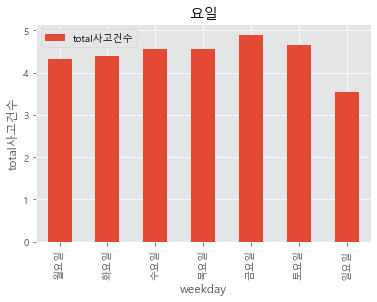

In [113]:
ax = Y1.plot(kind='bar',title='요일')
ax.set_xlabel('weekday')
ax.set_ylabel('total사고건수')

In [114]:
Z = X.groupby('날짜').mean()
Z

,total사고건수
날짜,
공휴일,3.359060
주말,4.128418
평일,4.609422


In [115]:
Z1 = Z.reindex(index=['평일','주말','공휴일'])
Z1

,total사고건수
날짜,
평일,4.609422
주말,4.128418
공휴일,3.359060


Text(0, 0.5, 'total사고건수')

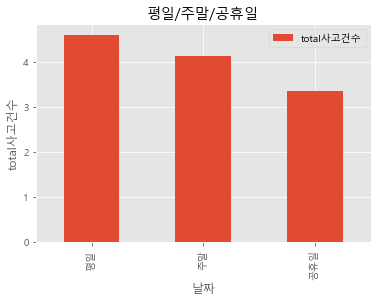

In [116]:
ax = Z1.plot(kind='bar',title='평일/주말/공휴일')
ax.set_xlabel('날짜')
ax.set_ylabel('total사고건수')

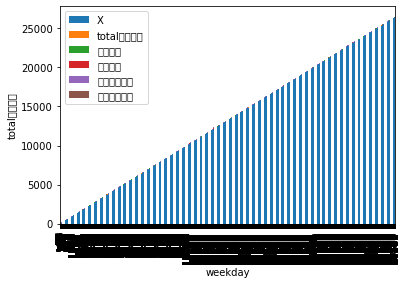